In [1]:
# Imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


C:\Users\Lai Wen Khai\AppData\Local\Temp\ipykernel_17220\2016063928.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# --- Dataset Loading and Initial Assessment ---
df = pd.read_csv('C:/um/output/extracted_error_features.csv', dtype={
    'client_ip': str,
    'error_file': str,
    # Other columns needing specific dtypes
})
# Assuming 'df' is your DataFrame
df = df[df['month'].isin([10, 11, 12, 1,3])]
#df['client_ip'] = df['client_ip'].map(str)
#df['error_file'] = df['error_file'].map(str)

# Convert to strings only if original data types are compatible
df['client_ip'] = df['client_ip'].astype(str) 
df['error_file'] = df['error_file'].astype(str) 


C:\Users\Lai Wen Khai\AppData\Local\Temp\ipykernel_17220\2531198696.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/um/output/extracted_error_features.csv', dtype={


In [3]:
# --- Target Transformation ---
df['is_critical_error'] = df['error_level_encoded'] == 3

# Feature selection 
features_to_use = ['pid','client_ip', 'error_file', 'hour', 'day', 'month']  # Adjust this list!
X = df[features_to_use]  
y = df['is_critical_error'].astype(float)


# Select categorical columns
categorical_columns = ['client_ip', 'error_file']

In [4]:
from sklearn.preprocessing import OneHotEncoder

def encode_column_in_chunks(df, column_name, chunk_size=10000):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Dense output for simplicity
    chunks = []
    for i in range(0, len(df), chunk_size):
        df_chunk = df[i:i+chunk_size].copy()
        encoded_chunk = encoder.fit_transform(df_chunk[[column_name]])
        chunks.append(pd.DataFrame(encoded_chunk, index=df_chunk.index))
    return pd.concat(chunks)




In [5]:
# Apply encoding to a copy of the filtered data 
df_encoded = df.copy()  


for col in categorical_columns:
    encoded_data = encode_column_in_chunks(df_encoded.copy(), col)
    df_encoded = pd.concat([df_encoded.drop(col, axis=1), encoded_data], axis=1) 

#loop all column
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].astype(str)

# Ensure remaining dtypes are appropriate 
print(df_encoded.info())

C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in vers

<class 'pandas.core.frame.DataFrame'>
Index: 563580 entries, 0 to 849409
Data columns (total 76 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   pid                  563580 non-null  object
 1   client_port          563580 non-null  object
 2   error_line           563580 non-null  object
 3   hour                 563580 non-null  object
 4   day                  563580 non-null  object
 5   month                563580 non-null  object
 6   year                 563580 non-null  object
 7   error_level_encoded  563580 non-null  object
 8   is_critical_error    563580 non-null  object
 9   0                    563580 non-null  object
 10  1                    563580 non-null  object
 11  0                    563580 non-null  object
 12  1                    563580 non-null  object
 13  2                    563580 non-null  object
 14  3                    563580 non-null  object
 15  4                    563580 non-null  o

In [6]:
# Assuming df_encoded is your DataFrame
prefix = 'review_'

# Get the first 9 columns
first_n_columns = df_encoded.iloc[:, :9]

# Get the columns starting from the 10th column onwards
columns_to_prefix = df_encoded.iloc[:, 9:]

# Add prefix to selected columns
columns_to_prefix = columns_to_prefix.add_prefix(prefix)

# Concatenate the first 9 columns with the modified columns
df_encoded = pd.concat([first_n_columns, columns_to_prefix], axis=1)

In [7]:
print(df_encoded.columns)

Index(['pid', 'client_port', 'error_line', 'hour', 'day', 'month', 'year',
       'error_level_encoded', 'is_critical_error', 'review_0', 'review_1',
       'review_0', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5',
       'review_6', 'review_7', 'review_8', 'review_9', 'review_10',
       'review_11', 'review_12', 'review_13', 'review_14', 'review_15',
       'review_16', 'review_17', 'review_18', 'review_19', 'review_20',
       'review_21', 'review_22', 'review_23', 'review_24', 'review_25',
       'review_26', 'review_27', 'review_28', 'review_29', 'review_30',
       'review_31', 'review_32', 'review_33', 'review_34', 'review_35',
       'review_36', 'review_37', 'review_38', 'review_39', 'review_40',
       'review_41', 'review_42', 'review_43', 'review_44', 'review_45',
       'review_46', 'review_47', 'review_48', 'review_49', 'review_50',
       'review_51', 'review_52', 'review_53', 'review_54', 'review_55',
       'review_56', 'review_57', 'review_58', 'review_5

In [8]:
df_encoded['is_critical_error'] = df_encoded['is_critical_error'].map({'True': 1.0, 'False': 0.0})
df_encoded['is_critical_error'] = df_encoded['is_critical_error'].astype(float)

print(df_encoded.head)

<bound method NDFrame.head of           pid client_port error_line hour day month  year error_level_encoded  \
0       25869       50628          0    9  17     1  2022                   2   
1       25894       50636          0    9  17     1  2022                   2   
2       25929       52127          8   10  17     1  2022                   2   
3       25929       52127          8   10  17     1  2022                   2   
4       25929       52127         15   10  17     1  2022                   1   
...       ...         ...        ...  ...  ..   ...   ...                 ...   
849405  17509        6277         25   23  31     3  2023                   1   
849406  17509        6277        190   23  31     3  2023                   1   
849407  17518       11903         24   23  31     3  2023                   2   
849408  17543       41538         25   23  31     3  2023                   1   
849409  17543       41538        190   23  31     3  2023                   1  

In [9]:
print(df_encoded.columns)

Index(['pid', 'client_port', 'error_line', 'hour', 'day', 'month', 'year',
       'error_level_encoded', 'is_critical_error', 'review_0', 'review_1',
       'review_0', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5',
       'review_6', 'review_7', 'review_8', 'review_9', 'review_10',
       'review_11', 'review_12', 'review_13', 'review_14', 'review_15',
       'review_16', 'review_17', 'review_18', 'review_19', 'review_20',
       'review_21', 'review_22', 'review_23', 'review_24', 'review_25',
       'review_26', 'review_27', 'review_28', 'review_29', 'review_30',
       'review_31', 'review_32', 'review_33', 'review_34', 'review_35',
       'review_36', 'review_37', 'review_38', 'review_39', 'review_40',
       'review_41', 'review_42', 'review_43', 'review_44', 'review_45',
       'review_46', 'review_47', 'review_48', 'review_49', 'review_50',
       'review_51', 'review_52', 'review_53', 'review_54', 'review_55',
       'review_56', 'review_57', 'review_58', 'review_5

In [10]:
# Split into features (X) and target (y)
X = df_encoded.drop('is_critical_error', axis=1)  
y = df_encoded['is_critical_error']

In [11]:
df_encoded = df_encoded.drop('is_critical_error', axis=1)  
df_encoded = df_encoded.drop('error_level_encoded', axis=1)

In [12]:
#remove duplicated columns
unique_cols = ~df_encoded.columns.duplicated()
df_encoded = df_encoded.loc[:, unique_cols]
print(df_encoded.columns) 

Index(['pid', 'client_port', 'error_line', 'hour', 'day', 'month', 'year',
       'review_0', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5',
       'review_6', 'review_7', 'review_8', 'review_9', 'review_10',
       'review_11', 'review_12', 'review_13', 'review_14', 'review_15',
       'review_16', 'review_17', 'review_18', 'review_19', 'review_20',
       'review_21', 'review_22', 'review_23', 'review_24', 'review_25',
       'review_26', 'review_27', 'review_28', 'review_29', 'review_30',
       'review_31', 'review_32', 'review_33', 'review_34', 'review_35',
       'review_36', 'review_37', 'review_38', 'review_39', 'review_40',
       'review_41', 'review_42', 'review_43', 'review_44', 'review_45',
       'review_46', 'review_47', 'review_48', 'review_49', 'review_50',
       'review_51', 'review_52', 'review_53', 'review_54', 'review_55',
       'review_56', 'review_57', 'review_58', 'review_59', 'review_60',
       'review_61', 'review_62', 'review_63', 'review_64']

In [13]:
from sklearn.impute import SimpleImputer


# Imputation after encoding
imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
print(df_encoded.head())

       pid  client_port  error_line  hour   day  month    year  review_0  \
0  25869.0      50628.0         0.0   9.0  17.0    1.0  2022.0       1.0   
1  25894.0      50636.0         0.0   9.0  17.0    1.0  2022.0       1.0   
2  25929.0      52127.0         8.0  10.0  17.0    1.0  2022.0       1.0   
3  25929.0      52127.0         8.0  10.0  17.0    1.0  2022.0       1.0   
4  25929.0      52127.0        15.0  10.0  17.0    1.0  2022.0       1.0   

   review_1  review_2  ...  review_55  review_56  review_57  review_58  \
0  0.083125       0.0  ...        0.0        0.0        0.0        0.0   
1  0.083125       0.0  ...        0.0        0.0        0.0        0.0   
2  0.083125       0.0  ...        0.0        0.0        0.0        0.0   
3  0.083125       0.0  ...        0.0        0.0        0.0        0.0   
4  0.083125       0.0  ...        0.0        0.0        0.0        0.0   

   review_59  review_60  review_61  review_62  review_63  review_64  
0        1.0     0.0224     

In [15]:
# Decision Tree Model 
dt_model = DecisionTreeClassifier(random_state=42) 

In [16]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 8, None], # None for no max_depth limit
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'] 
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 


C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\lin

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
# ... Other metrics ... 
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9979328578019092
Confusion Matrix:
 [[112483      0]
 [   233      0]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

Random Forest Accuracy: 0.9979328578019092
Random Forest Confusion Matrix:
 [[112483      0]
 [   233      0]]
precision: 0.0
recall: 0.0
f1: 0.0


C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='Predicted', ylabel='Actual'>

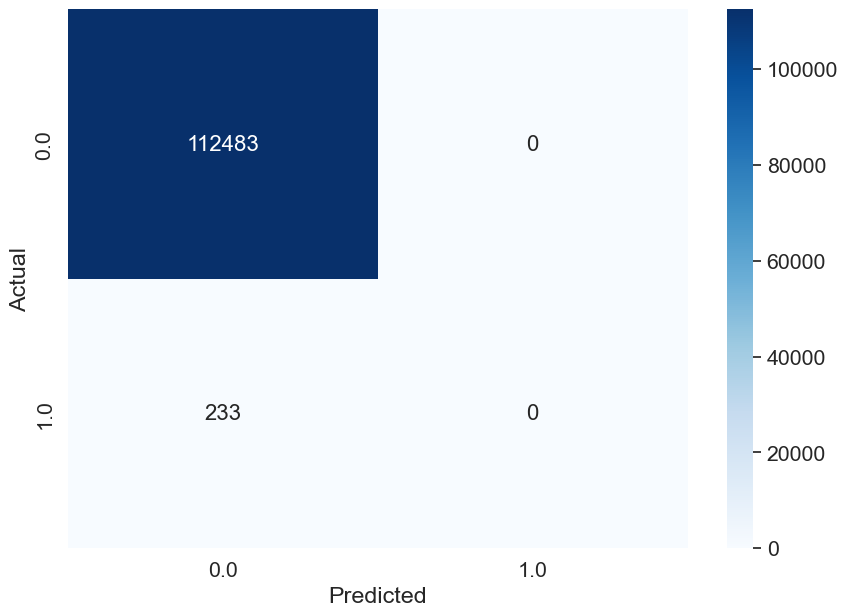

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')